## Machine Learning Project Checklist
1. Frame the problem
2. Get the data
3. Explore the data
4. Prepare the data 
5. Explore different models and short-list the best ones
6. Fine-tune your models 
7. Present your solution 


### Iris dataset
**Description**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

###### From https://en.wikipedia.org/wiki/Iris_flower_data_set

***Download the dataset:*** https://archive.ics.uci.edu/ml/datasets/iris

### Goal
Build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.

### Classification Pipeline
1. Look the Structure of the Database
2. Visualization
3. Split the data into train and test sets
4. Preprocessing
5. Train the model
6. Make predictions
7. Evaluate the model 
8. Compare the results
9. Parameter optimization

### Python for Classification
The main Python libraries are: scikit-learn, numpy, scipy, pandas matplotlib and seaborn

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

### 1. Explore the Structure of the Database

In [2]:
#Step 1. Upload the dataset


db = pd.read_csv("/Users/Paolo/Desktop/tutorial_01_material/iris.csv")


In [3]:
#Step 2. Explore the dataset structure
# head() returns the first n rows (default n = 5).
db.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Each row represents one iris. There are 4 main attributes: sepal_length, sepal_width, petal_length and petal_width. The target is specified by the "species".

The info() method returns a small description of the daset. In particular the number of rows (150), attribute's type and number of non-null values. Apply the info() method to the db. You will notice that in this case we don't have null values.

In [4]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


With value_counts() method we can find out how many classes we have and how many entries belong to each class. This is especially useful to understand whether our dataset is balanced or imbalanced.

In [5]:
# Count how many variables you have in each class 
db["Name"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Name, dtype: int64

The describe() method returns a summary of the numerical attributes. It can help for double-checking eventual errors in the computation of the features.

In [6]:
#  gives a summary of the numerical attributes
db.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Visualization

Visual inspecting the data helps to find abnormalities and pecularities of the dataset. 

***Histograms***

A quick way to get a feel of the type of data you are dealing with is to plot histograms. Histograms show the number of instances (vertical axis) that have a given value range (horizontal axis).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d0ae10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112f8e668>]], dtype=object)

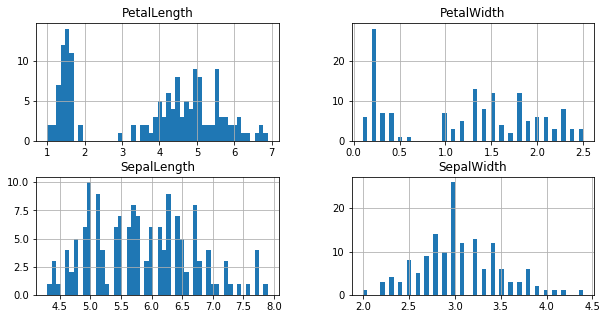

In [7]:
db.hist(bins=50, figsize=(10,5))

We can observe that the attributes have different scales, this is a useful information, we will see later when we explore feature scaling. Some attributes have a bell-shaped distribution which helps algorithms to detect patterns. For example we can notice that most of the iris have the sepal width equals to 3 cm. Others distributions have multiple modes. 
More about how to interpret histograms here: http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/graphs/histogram/interpret-the-results/key-results/ .
        

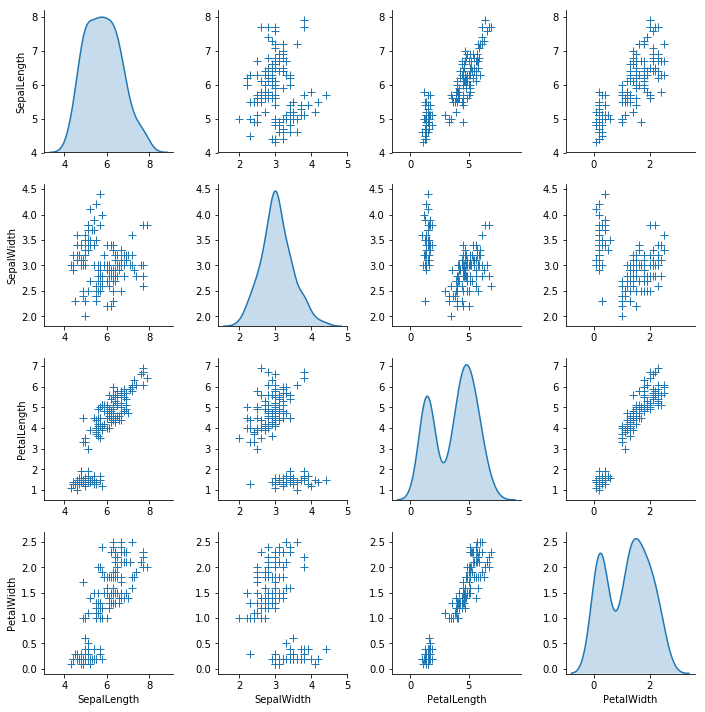

In [8]:
# Similar representation using seaborn
sn.pairplot(db, diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

*** Scatter plot ***

A scatter plot of the data puts one feature along the x-axis and another feature along the y-axis and draws a point for each data point. Unfortunately we can plot two or three features at the same time. The pair plot allows to visualize all the pairs of two features. It does not show the entire interaction of all the features at once, so some interesting aspects of the data may not be reveald. However it gives an intuition on how well the variables are separable. In this case the three classes seem to be relatively well separated. This indicates that a Machine Learning model will likely be able to learn to separate them. 

KeyError: 'species'

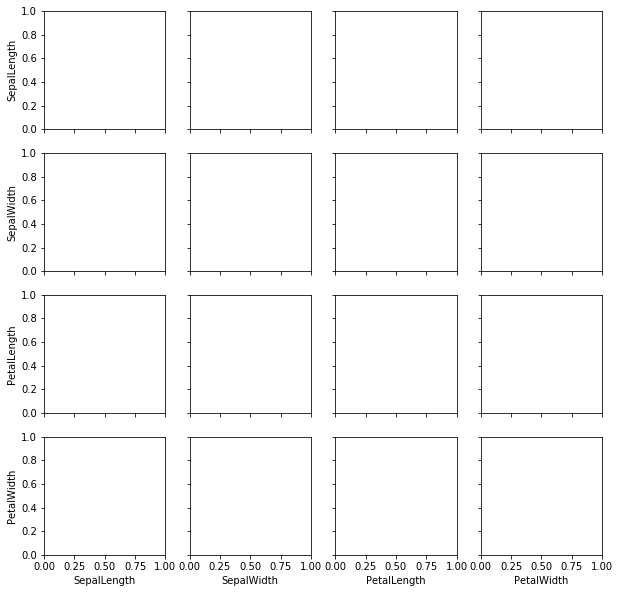

In [9]:
g = sn.pairplot(db, hue="species")

You can explore other plots of the iris dataset at: https://seaborn.pydata.org/generated/seaborn.pairplot.html

### 3. Split the Dataset in Training and Test sets

In order to build the model and then test its performance we have to use a training and test sets. The training set is used for fitting the model's parameters, while the test set is used for evaluating the prediction performance of the model. Common practice is to divide the entire data set into training and test sets. It is possible to do this in multiple ways. We will focus on two well-known methods: random split and cross validation. 

### Random split

Scikit-lean contains the function: ***train_test_split***
which shuffles and and splits the dataset. It is possible to decide the size of the test set, a common procedure is to use a 30% for the test set and a 70% for the train set. The function shuffles the data using a pseudo random generator before making the split. Every time we run the eperiment, we will have different data sets. In ordered to have the same outcome, we can fix the seed. However this limits the generability of the results. This method is enough if the data set is large, otherwise you risk to introduce a sampling bias. Indeed the test set  should be representative of the categories in the whole data set.

In [10]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

# Randomly split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.30, random_state=4)

print X_test.shape

# Plot the histogram of the y test set
y_test = pd.Series(y_test) #convert the array into a pandas Series
y_test.hist()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(X_test.shape)? (<ipython-input-10-62c674a72cc3>, line 12)

In this case the test set is not really representative of the data set. Indeed we have a balance data set, so also the test set should be balanced. In this case instead we have more instances of the setosa iris, compared to the versicolor and virginica.

### K- fold Cross Validation

A possible solution to the bias issue, especially for small data set, is to use the K-fold cross validation. The algorithm splits the data set into K distinct subsets called folds. Then it trains and evaluate the model of interest K times picking a different fold for evaluation every time and training on the other K-1 folds. After this procedure we will have K values of the performance metric of interest, one for each fold. Usually the final result is obtained by computing the mean of these values.

Scikit-learn provides methods to directly compute a performance metric using cross validation (for example: cross_val_score). However usually you may need more control over the cross-validation process. So in these cases it is better to implement cross-validation yourself. Now we see how to split the data into training and test sets using 10-Fold cross validation.

In [11]:
# 10-Fold cv
kf = KFold(n_splits=10,random_state=4, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 10 folds, we use 4 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

NameError: name 'X' is not defined

### 4. Data Pre-processing

Before applying Machine Learning algorithms, it is usually useful to apply some data transformations. One of the most important transformation is ***feature scaling***. Indeed some ML algorithms do not perform well when the input attributes have different scales. There are two common ways to scale the features: 1. min-max scaling 2. standardization.


*** Min-max scaling***

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

Scikit-learn provides the transformer called MinMaxScaler which, using this formula brings the values between 0-1. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In order to apply a MinMaxScaler to our train and test sets we have to declare it first, than use the method fit() which computes the minimum and maximum to be used for later scaling. And then the method transform() which scales the features according to feature_range (default [0,1]).

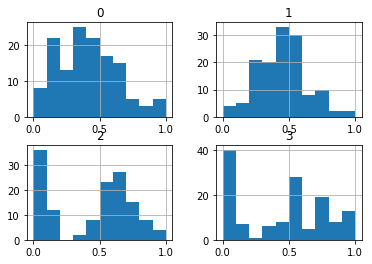

In [63]:
from sklearn.preprocessing import MinMaxScaler

kf = KFold(n_splits=10,random_state=4, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 10 folds, we use 4 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];
    
    # Apply MinMaxScaler on the training and test set
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train);
    X_test_scaled = scaler.transform(X_test);
    
train = pd.DataFrame(X_train_scaled).hist()

### 5. Train a Model

All ML models in Scikit-learn are implemented in their own class, which are called Estimator  classes. The first step for using a model is to instantiate the class into a object. In this phase we can set all the parameters. The classifier object incorporates the algorithm to build the model from the training data, as well the algorith, to make predictions on new data points. to build the model on the training set, we call the fit() method. It takes as imput the X_training and the y_training, containing the training and data and the corresponding labels. Let's see a simple example using the ***Support Vector Machine (SVM)*** with a linear kernel (http://scikit-learn.org/stable/modules/svm.html).

Moreover we try to simplify the problem, by considering it as a binary classification problem. We try to distinguish between two classes: *** setosa iris *** and *** non-setosa iris ***.

In [64]:
# Instantiate the SVM object
clf = svm.SVC(kernel='linear')

kf = KFold(n_splits=10,random_state=4, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 10 folds, we use 4 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];
    
    # True for all setosa iris and false for all the others
    y_train_setosa = (y_train == 'setosa')
    y_test_setosa = (y_test == 'setosa')

    # Apply MinMaxScaler on the training and test set
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train);
    X_test_scaled = scaler.transform(X_test);
    
    # Build the model 
    clf.fit(X_train_scaled, y_train_setosa)


### 6. Make Predictions

Now we can make pedictions using this model on unseen data. We can do this with method predict(), which take as input the new data: X_test.

In [65]:
# Instantiate the SVM object
clf = svm.SVC(kernel='linear')

kf = KFold(n_splits=10,random_state=4, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 10 folds, we use 4 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];
    
    # True for all setosa iris and false for all the others
    y_train_setosa = (y_train == 'setosa')
    y_test_setosa = (y_test == 'setosa')

    # Apply MinMaxScaler on the training and test set
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train);
    X_test_scaled = scaler.transform(X_test);
    
    # Build the model 
    clf.fit(X_train_scaled, y_train_setosa)
    
    # Make prediction
    prediction = clf.predict(X_test_scaled)

# Let's print the last fold prediction
print prediction


[ True  True False False False False False False False False False False
 False False False]


In this case we can see that only two iris were predicted as 'setosa' while the others not. But how do we know whether we can trust the model?

### 7. Evaluate the model 

Since we know the labels of the test set, we can compare the predictions made by the model with the the actual labels. Different metrics extist for evaluating classifiers, among the most used there are: ***accuracy, precision, recall, F1 and the area under the ROC curve ***. 
The choice of the metric depends on the goal of the project. Most of the metrics are based on the ***confusion matrix***.

#### Confusion Matrix 
1. ***True Positives (TP)***: True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True).

2. ***True Negatives (TN)***: True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False

3. ***False Positives (FP)***: False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). False is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1)

4. ***False Negatives (FN)***: False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False is because the model has predicted incorrectly and negative because the class predicted was a negative one. (0)

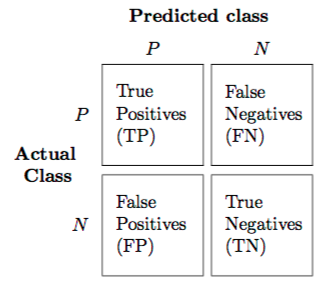

In [66]:
Image("C:\Users\user\switchdrive\TA/Information Analysis and Modeling/tutorials_material/tutorial_01/confusion_matrix.png")

#### Accuracy 
Now we calculate the accuracy of the SVM linear 

In [7]:
 # Instantiate the SVM object
clf = svm.SVC(kernel='linear')

kf = KFold(n_splits=10,random_state=4, shuffle=True)
kf.get_n_splits(X)

accuracy = []
# we divide the datasets in 10 folds, we use 4 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];
    
    # True for all setosa iris and false for all the others ---> change with "setosa"
    y_train_iris = (y_train == 'versicolor')
    y_test_iris = (y_test == 'versicolor')

    # Apply MinMaxScaler on the training and test set
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train);
    X_test_scaled = scaler.transform(X_test);
    
    # Build the model 
    clf.fit(X_train_scaled, y_train_iris)
    
    # Make prediction
    prediction = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test_iris, prediction)
   # print confusion_matrix(y_test_iris,prediction)
    accuracy.append(acc)

print accuracy
#print np.mean(accuracy)


[0.8, 0.9333333333333333, 0.6666666666666666, 0.5333333333333333, 0.6666666666666666, 0.6, 0.4, 0.7333333333333333, 0.8, 0.6]


### *** Exercise: *** change the target iris to "setosa", what does it change? Could we have expected this? Why?

In [ ]:
# YOUR CODE HERE

### Scikit-learn Pipeline

Most ML applications, require the chaining of many different processing steps and machine learning models. Scikit-learn provides the Pipeline class to help with this sequence of transformations. There is a function ***make_pipeline*** that will create a pipeline for us and automatically name each step based on its class. We can then use the cross_val_score function to compute the cross validation using the built pipeline.It returs an array of scores of the estimator for each run of the cross validation. We can change the metric of interest using the parameter: scoring.

(http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).

In [104]:
# Create the pipeline
clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel ='linear'))

# Apply the pipeline using a 10-Fold cv
svm_accuracy = cross_val_score(clf, X, y == 'versicolor', cv=kf, scoring = 'accuracy' )
np.mean(svm_accuracy)

0.6733333333333333

### 8. Compare the results

Common practice in ML applications is to compare the results obtained with our model with a baseline. Usually a Random Guess Classifier is used as baseline. It randomly assigns half of the labels to 
the positive class and the other half to the negative class. Let's see whether our model performs better than the Random Guess. The Random Classifiers are implemented from the Scikit-learn DummyClassifier() class: http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html.

http://blog.revolutionanalytics.com/2016/03/classification-models.html

In [74]:
# Create the pipeline, a RG is obtained using the strategy = 'uniform' 
clf = make_pipeline(MinMaxScaler(), dummy.DummyClassifier(strategy='uniform'))

# Apply the pipeline using a 10-Fold cv
random_accuracy = cross_val_score(clf, X, y == 'versicolor', cv=kf, scoring = 'accuracy' )
random_accuracy

array([0.4       , 0.66666667, 0.53333333, 0.46666667, 0.46666667,
       0.4       , 0.4       , 0.4       , 0.33333333, 0.6       ])

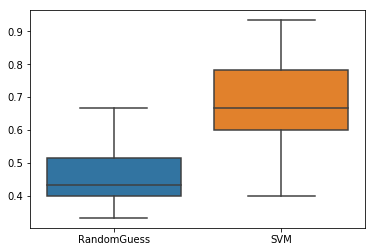

In [75]:
metrics_db = pd.DataFrame({'SVM': svm_accuracy, 'RandomGuess': random_accuracy})
ax = sn.boxplot(data=metrics_db)

***Our model performs much better than the RG classifier!***

### *** Exercise. *** Among the random classifiers, the classifier that predicts always the most frequent class is often used. Compare the accuracy of this classifier with the accuracy of the svm.  

In [ ]:
### YOUR CODE HERE ###

### 9. Parameters Optimization

Once we have decided which are the best models among all we have tried, we can move forward and try to optimize those. One way to do this is changing manually the hyperparameters of the model until you get a great combination. However this is tedious and time consuming. Scikit-learn provides the GridSearchCV method which searches for you (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). It requires the hyperparameters you want it to experiment with, and what values to try out. Then it  will evaluate all the possible combinations of hyperparameters and values using cross-validation.

### Linear SVM Parameters  
SVM is particularly well suited for classififcation of complex but small or medium-sized datasets.

We want to find some lines that split the data between the two differently classified groups of data as well as we can. This will be the line such that the distances from the closest point in each of the two groups will be farthest away. 
Once we get the line, that's our classifier. Then depending on where the testing data lands on either side of the line, that's what class we can classify the new data as.

The left plot shows three possible linear classifiers. The dashed line does not even separate the classes. But the other two are too closed  to the instances, so probably they will not perform well on new instances. In contrast the solid line in the right picture not only separates well the two classes but also stays as far away as possible from the closest training instances as possible. The instances located to the edge of the dashed lines are the support vectors and determines the margins of the classification.

*** C parameter ***

We have to find a balance between keeping the margins as large as possible and limiting the margins violations. From the figure below (left picture) we can see that if we impose that all the instances have to be off the margins, we can not find the model that separates these classes due to the presence of the outiler. Instead the right pictures show a too small marging which will probably not generalize well for new instances. We can controll the balance between keeping the margins large and limiting the margin violation using the hyperparameter C. A smaller C leads to a wider margin but more margin violations. We can optimize the SVM for our problem chosing the best C.

### ***Exercise.*** Let's try to change values of C. Try with C = 0.01, 0.1, 1, 10, 100

NameError: name 'matplotlib' is not defined

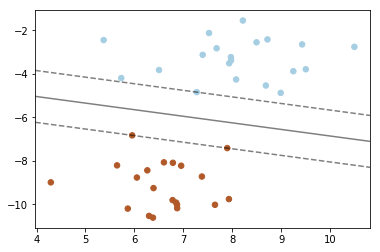

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

matplotlib.rcParams['figure.figsize']
plt.show()

From: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
#iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = X[:, :2]
y = pd.Series(y)
y= y.replace(['versicolor','setosa','virginica'],['0','1','2'])
#y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
matplotlib.rcParams['figure.figsize']

plt.show()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

From http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

*** GridSearchCV ***

Implements an exhaustive search over specified parameter values for an estimator (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).



In [8]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

# Randomly split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=4)


In [11]:
# Create the pipeline
clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel ='linear'))

# Define which are the parameters you are interested in. In this case C. 
# Syntax: classifier name__parameter.
# Common practice for choosing the parameters values is to try consecutive powers of 10 
# or a smaller number if you want a more fine-grained search.
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] }

# Define the parameters of the GridSearch and fit it.
grid = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')
grid.fit(X_train, y_train =='versicolor')

print("best cross-validation accuracy:", grid.best_score_)
print("test set score:", grid.score(X_test,y_test=='versicolor'))
print("best parameters:", grid.best_params_)

('best cross-validation accuracy:', 0.780952380952381)
('test set score:', 0.7555555555555555)
('best parameters:', {'svc__C': 100})


Using GridSearchCV we have improved the performance of the classifier!

In [12]:
scoring = {'precision':make_scorer(precision_score,average='weighted'), 
           'recall': make_scorer(recall_score,average='weighted'),
           'accuracy':make_scorer(accuracy_score),
           'f1_score':make_scorer(f1_score,average='weighted')}

param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] }

clf =  clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel ='linear'))
grid = GridSearchCV(clf,param_grid=param_grid,scoring=scoring,cv=5,refit='f1_score')
grid.fit(X_train,y_train)

results_raw = pd.DataFrame(grid.cv_results_,index=[0.001, 0.01, 0.1, 1, 10, 100])
selected_cols = [col for col in results_raw.columns.tolist() if 'mean' in col if 'time' not in col]
results = results_raw[selected_cols]

NameError: name 'make_scorer' is not defined